# Vibrational Motion

In the previous notebook, we discussed quantum mechanical problems involving translational motion: the free-particle, the particle-in-a-box model, the finite square well potential model, and tunneling through a one-dimensional potential energy barrier. In this notebook, we continue exploring model problems, with a focus, this time, on vibrational motion. In particular, we will find analytic solutions the Schrödinger equation for the (one-dimensional) quantum harmonic oscillator model, which captures the main qualitative features of vibrational motion in molecular systems. 

## The Harmonic Potential

A harmonic oscillator is a system that, when displaced from its equilibrium position, experiences a harmonic restoring force, which is proportional to the displacement. In one dimension, this force would be

$$ F_x = -k (x - x_e)$$

where $x - x_e$ is the displacement from the equilibrium position, $x_e$, and $k$ is the proportionality constant, which is called the force constant. Recall that force and potential are related by

$$ F_x = -\frac{d }{dx}V(x) = -k ( x - x_e)$$

Integrating this expression yields the potential

$$ V(x) = \frac{1}{2} k (x - x_e)^2 + c$$

where $c$ is an arbitrary additive constant. This constant will not affect the solutions to the classical or quantum harmonic oscillator problems, but it will provide an arbitrary shift to the associated energies. For convenience, we choose $c = 0$, and we proceed with the potential

$$ V(x) = \frac{1}{2} k (x - x_e)^2$$

Because the harmonic oscillator problem is a model for molecular vibrations, it will be illustrative to consider how this potential relates to one for an actual molecular system. For the sake of simlicity, let us take the molecule to be molecular hydrogen, H$_2$. Below, we will calculate the potential energy curve along the bond stretch coordinate for H$_2$ using one of the simplest procedures for finding approximate solutions to the electronic part of the Schrödinger equation, the Hartree-Fock approach. You can read more about Hartree-Fock theory in [this notebook](https://deprincelab.github.io/tutorials/jupyter_notebooks/hartree_fock/index.html). Specifically, we will use the unrestricted Hartree-Fock approach, as implemented in the [Psi4](https://psicode.org) electronic structure package, with the cc-pVDZ basis set.

In [17]:
import psi4
import numpy as np

# set molecule
mol = psi4.geometry("""
h
h 1 x
symmetry c1
""")   

# set some options for psi4
psi4.set_options({'basis': 'cc-pvdz',
                  'guess_mix': True,
                  'reference': 'uhf'})

# tell psi4 not to print any output to the screen
psi4.core.be_quiet()

# calculate the energy at different H-H separations, x
potential = []
dx = 0.05
x = np.arange(0.4, 3.05, dx)
for i in range (0, len(x)):
    mol.x = x[i]
    en = psi4.energy('scf')
    potential.append(en)

Now, let us visualize this potential (shifted so that the minimum value is zero)

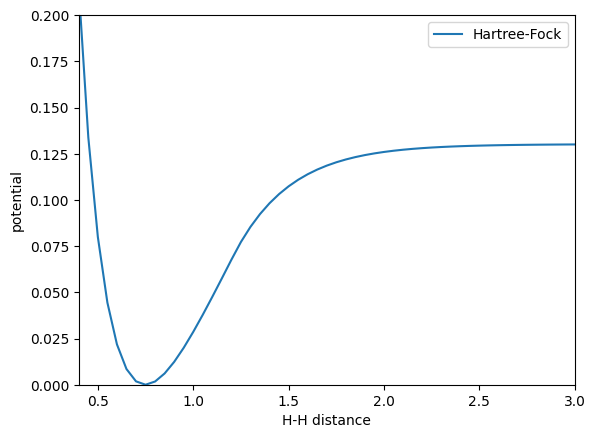

In [18]:
# minimum energy
V_e = min(potential)

# shift potential so the minimum value is zero
potential = np.array(potential) - V_e

import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, potential, label='Hartree-Fock')
plt.xlim(x[0], x[-1])
plt.ylim(0, 0.2)
plt.ylabel('potential')
plt.xlabel('H-H distance')
plt.legend()
plt.show()

Near the equilibrium H-H distance, the potential in which the nuclei live looks harmonic, i.e., it could be approximated by a quadratic function. How can we extract an appropriate force constant, $k$, from this potential? Well, if 

$$ V(x) = \frac{1}{2} k(x-x_e)^2$$

then, 

$$ k = \frac{d^2}{dx^2} V(x) $$

So, we take $k$ to be the second derivative of the potential, evaluated at the equilibrium geometry. The second derivative of the potential can be calculated numerically, via the centered [finite difference](https://en.wikipedia.org/wiki/Finite_difference) formula

$$k \approx \frac{V(x_e + h) - 2 V(x_e) + V(x_e - h)}{h} $$

where $h$ is a displacement from the equilbrium H-H distance, $x_e$. Here, we calculate $k$ in this way and visualize the harmonic and Hartree-Fock potentials together.

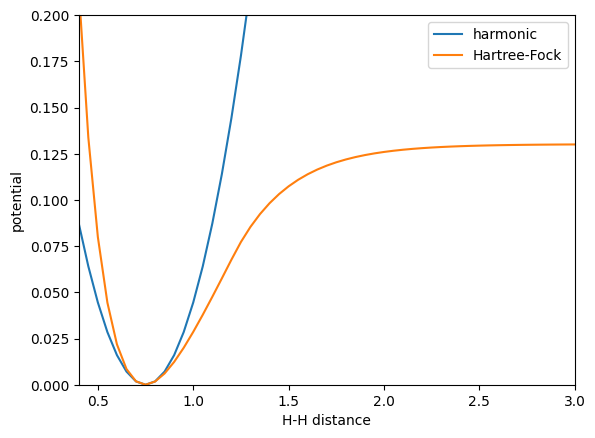

In [19]:
# equilbirum bond length
idx = np.argmin(potential)
x_e = x[idx]

# k = d^2 V(x) / dx^2
k = (potential[idx+1] - 2.0 * potential[idx] + potential[idx-1]) / dx**2

# harmonic potential
harmonic = 0.5 * k * (x-x_e)**2

plt.figure()
plt.plot(x, harmonic, label='harmonic')
plt.plot(x, potential, label='Hartree-Fock')
plt.xlim(x[0], x[-1])
plt.ylim(0, 0.2)
plt.ylabel('potential')
plt.xlabel('H-H distance')
plt.legend()
plt.show()

Clearly these potentials have some major qualitative differences, the most obvious of which is that the Hartree-Fock potential tends to some constant value in the limit of dissociation, whereas the harmonic potential does not. Indeed, for the harmonic potential, $V(x)$, 

$$ \lim_{x\to\infty} V(x) = \infty $$

Nonetheless, the harmonic potential does a reasonable job of approximating the Hartree-Fock one near equilibrium. Hence, we consider the quantum harmonic oscillator model to be useful for describing low-energy vibrational states only. Higher-energy states will be poorly described by this model. 

## One-Dimensional Classical Harmonic Oscillator

Now, we seek solultions to the classical harmonic oscillator problem. In this case, let us assume that the equilibrium position, $x_e = 0$, and note that we would like to solve for the position as a function of time, $x(t)$. Recall that the harmonic restoring force is linear in the displacement, 

$$ F_x = -k x(t)$$

Classically, we can find an analytic form for how the displacement evolves over time with the help of Newton's second law,

$$F_x = m a_x(t)$$

where the acceleration of the oscillator, $a_x(t)$, is the second time derivative of the position, i.e.,

$$a_x(t) = \frac{d^2}{dt^2} x(t)$$

So, we seek a solution to the differential equation

$$ m \frac{d^2}{dt^2} x(t) = -k x(t)$$ 

which has a general solution

$$ x(t) = C\text{sin}\left ( \left [ k/m \right ]^{1/2} t \right ) + D \text{cos}\left( \left [ k/m \right ]^{1/2} t \right )$$

or 

$$ x(t) = A\text{sin}\left ( \left [ k/m \right ]^{1/2} t + B \right ) $$

where $B$ represents a phase shift. This solution tells us that harmonic motion is sinusoidal, which we can visualize using the following code. In this case, let us take some arbitrary values for $k$, $m$, $A$, and $B$, which are all specified below. In addition to visualizing the position, $x(t)$, we will also plot the kinetic energy, $T$, and potential energy, $V$ as functions of time. 

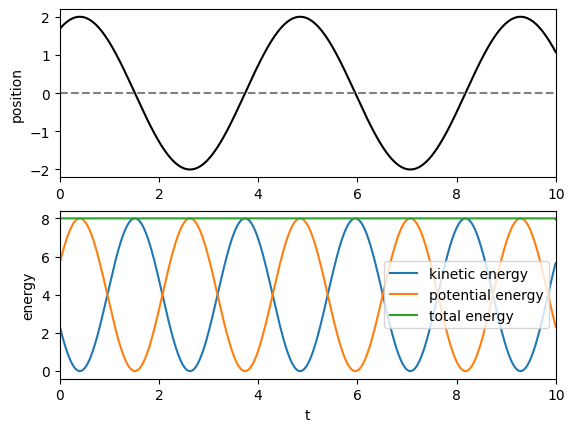

In [20]:
dt = 0.01
t = np.arange(0, 10.01, dt)

k = 4.0
m = 2.0
B = 1.0
A = 2.0

# position, x(t)
x_t = A * np.sin(np.sqrt(k/m) * t + B)

# calculate velocicty from the position using np.gradient
velocity = np.gradient(x_t, t)

# kinetic energy
T = 0.5 * m * velocity**2

# potential energy
V = 0.5 * k * x_t**2

# plot position
fig, axs = plt.subplots(2)
axs[0].plot(t, x_t, color = 'black')
axs[0].axhline(y=0.0, color='gray', linestyle='--')

axs[0].set_xlim(0, 10)
axs[0].set_ylabel('position')

# plot kinetic and potential energy
axs[1].plot(t, T, label = 'kinetic energy')
axs[1].plot(t, V, label = 'potential energy')
axs[1].plot(t, T + V, label = 'total energy')

axs[1].set_xlim(0, 10)
axs[1].set_ylabel('energy')
axs[1].set_xlabel('t')

plt.legend()
plt.show()

The displacement, $x(t)$, oscillates between $A$ and $-A$ with a frequency, $\nu$, 

$$ \nu = \frac{1}{2\pi}  \left ( \frac{k}{m} \right )^{1/2}$$

It will be useful at times to also consider the *angular frequency*, $\omega$, which is related to $\nu$ by a factor of $2 \pi$:

$$ \omega = 2 \pi \nu = \left ( \frac{k}{m} \right )^{1/2}$$

The kinetic and potential energy also oscillate in time, but their sum, the total energy, is constant in time. This result makes sense because the oscillator is not being driven, nor is it interacting with any sort of bath, so the total energy should be conserved. Note also that the frequency with which the the kinetic and potential energy oscillate is twice the frequency with which the position oscillates. This behavior reflects the symmetry of the potential, $V(x)$. For example, the potential energy should go to zero twice per single oscillation of the position, once as the oscillator moves past its equilibrium position in the $+x$ direction and again when it passes through equilibrium in the $-x$ direction. Similarly, the kinetic energy should go to zero twice per oscillation in the position, at the two **classical turning points**. 

The classical turning point is the point at which the potential energy is equal to the total energy and the kinetic energy is equal to zero. The term, turning point, refers to the fact that this is the point at which the oscillator stops moving and reverses direction. For the classical harmonic oscillator with 

$$ x(t) = A\text{sin}\left ( \left [ k/m \right ]^{1/2} t + B \right ) $$

the turning points are simply $-A$ and $A$. Let's visualize the classical turning points, total energy, and  harmonic potential together.

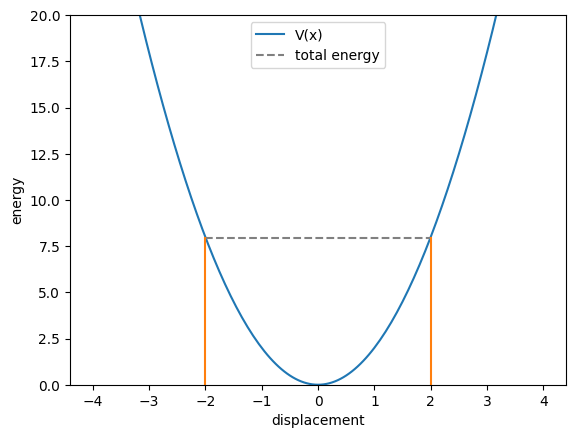

In [21]:
# total energy at time zero
energy = T[0] + V[0]

# turning points
x_max = A
x_min = -A
    
# harmonic potential. 
dx = 0.05
x = np.arange(-4, 4.05, dx)
harmonic = 0.5 * k * x**2

plt.figure()
plt.plot(x, harmonic, label='V(x)')

plt.plot([x_min, x_max], [energy, energy], color='gray', linestyle='--', label = 'total energy')
plt.plot([x_min, x_min], [0, energy], color = 'tab:orange', linestyle = '-')
plt.plot([x_max, x_max], [0, energy], color = 'tab:orange', linestyle = '-')

plt.ylim(0, 20)
plt.ylabel('energy')
plt.xlabel('displacement')
plt.legend()
plt.show()

Note that the classical harmonic oscillator will never be found with a displacement beyond the turning points. As we will find below, the situation will be different for the quantum harmonic oscillator.

## One-Dimensional Quantum Harmonic Oscillator

Now, we would like to consider the quantum mechanical treatment of the one-dimensional harmonic oscillator problem. Given the potential explored in the previous section, 

$$ V(x) = \frac{1}{2} k x^2$$,

the Hamiltonian has the form

$$ \hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x)$$

$m$ represents the mass of the oscillator, and we have assumed that $x_e = 0$. Recall from the classical harmonic oscillator problem that the force constant is related to the frequency of oscillation as

$$ k = \frac{1}{2\pi}\left ( \frac{k}{m} \right )^{1/2}$$, so the potential can be expressed as

$$ V(x) = 2 m \nu^2 \pi^2 x^2$$

Now, it will be convenient to introduce a constant, $\alpha$, which is defined as

$$\alpha = \frac{2 \pi \nu m}{\hbar}$$

so that the Hamiltonian can be expressed as

$$ \hat{H} = -\frac{\hbar^2}{2m}\left ( \frac{d^2}{dx^2} - \alpha^2 x^2 \right )$$

As was the case for the translational problems explored in the previous notebook, this Hamiltonian is time-independent, so our goal is to find the eigenfunctions that satisfy the time-independent Schrödinger equation,

$$\hat{H} \psi(x) = E \psi(x)$$

or 

$$-\frac{\hbar^2}{2m}\left ( \frac{d^2}{dx^2} - \alpha^2 x^2 \right) \psi(x) = E \psi(x)$$

Rerranging this equation slightly gives us

$$\frac{d^2}{dx^2} \psi(x) + \left (\frac{2 m E}{\hbar^2} - \alpha^2 x^2 \right )\psi(x) = 0 $$

Unfortunately, we can see that this differential equation is much more complicated than any that we have encountered so far, which is attributable to the fact that the potential depends the displacement, $x$. In order to solve this equation, we find a power series solution.

### Power Series Solution to the Schrödinger Equation

The basic idea of a power series solution to a differential equation is to assume that the function, in this case, the wave function, $\psi(x)$, can be expanded as a power series

$$ \psi(x) = \sum_{n=0}^{\infty} a_n x^n = a_0 + a_1 x + a_2 x^2 + ...$$

This form can then be substituted back into the differential equation so that we can solve for the unknown expansion coefficients, $a_n$. Doing so, in this case, would lead to a three-term recursion relation amongst the coefficients. It turns out that a simpler, two-term recursion relation can be obtained by instead making a clever choice for the functional form of $\psi(x)$ before invoking the concept of the power series. Armed with the $\textbf{{\color{red}i}{\color{orange}n}{\color{yellow}f}{\color{green}i}{\color{blue}n}{\color{purple}i}{\color{violet}t}{\color{red}e}}$ $\textbf{{\color{orange}w}{\color{yellow}i}{\color{green}s}{\color{blue}d}{\color{purple}o}{\color{violet}m}}$ of already knowing the right answer, we will try

$$ \psi(x) = e^{-\alpha x^2/2} f(x)$$

and expand $f(x)$ as a power series, rather than $\psi(x)$. So, we have

$$ f(x) = \sum_{n=0}^\infty c_n x^n$$

and our task is to determine the coefficients, $c_n$. Let us begin by recognizing that the time-independent Schrödinger equation is a second-order differential equation, so we need to evaluate the second derivative of the wave function. The first derivative is

$$ \psi^\prime(x) = -\alpha x e^{-\alpha x^2/2} f(x) + e^{-\alpha x^2/2} f^\prime(x)$$

and the second derivative is

$$ \psi^{\prime\prime}(x) = e^{-\alpha x^2/2}\left [ -\alpha f(x) + \alpha^2 x^2 f(x) - 2\alpha x f^{\prime}(x) + f^{\prime\prime}(x) \right ]$$

Inserting $\psi(x)$ and $\psi^{\prime\prime}(x)$ into the Schrödinger equation yields

$$ e^{-\alpha x^2/2}\left [ -\alpha f(x) + \alpha^2 x^2 f(x) - 2\alpha x f^{\prime}(x) + f^{\prime\prime}(x) \right ] + \left (\frac{2 m E}{\hbar^2} - \alpha^2 x^2 \right ) e^{-\alpha x^2/2} f(x) = 0 $$

which simplifies to

$$ f^{\prime\prime}(x) - 2\alpha x f^{\prime}(x) + \left (\frac{2 m E}{\hbar^2} - \alpha\right )  f(x) = 0 $$

Now, we must evaluate the first and scond derivative of $f(x)$. Recall

$$ f(x) = \sum_{n=0}^{\infty} c_n x^n$$

so $f^{\prime}(x)$ is

$$ \begin{align}
f^{\prime}(x) &= \sum_{n = 1}^{\infty}n c_n x^{n-1} \\
&= \sum_{n = 0}^\infty n c_n x^{n-1}
\end{align}$$

where, in the second line, we note that the lower limit of the sum can be changed to zero without impacting the sum. The second derivative is

$$\begin{align}
f^{\prime\prime}(x) &= \sum_{n = 2} n(n-1) c_n x^{n-2}
\end{align}$$

By choosing a dummy index, $k = n-2$, we can adjust the summation limits so that they match those used in the first derivative expression

$$\begin{align}
f^{\prime\prime}(x) &= \sum_{k = 0} (k+2)(k+1) c_{k+2} x^k
\end{align}$$

or 

$$\begin{align}
f^{\prime\prime}(x) &= \sum_{n = 0} (n+2)(n+1) c_{n+2} x^n
\end{align}$$

Plugging these results back into 

$$ f^{\prime\prime}(x) - 2\alpha x f^{\prime}(x) + \left (\frac{2 m E}{\hbar^2} - \alpha\right )  f(x) = 0 $$

yields

$$ \sum_{n=0}^{\infty}  \left [ (n+2)(n+1) c_{n+2} - 2 \alpha n c_n + \left ( \frac{2mE}{\hbar^2} - \alpha \right ) c_n \right ] x^n = 0$$

Now, we note that the monomials, $x^n$, are linearly independent functions, which means that the polynomial in the above equation can only be satisfied for all values of $x$ if the coefficient in front of $x^n$ is zero, for all $n$. So we have

$$ (n+2)(n+1) c_{n+2} + \left (  - 2 \alpha n + \frac{2mE}{\hbar^2} - \alpha \right ) c_n  = 0\text{, }\forall n$$

which leads to a two-term recursion relation

$$ c_{n+2} = \frac{2\alpha n - 2mE/\hbar^2 + \alpha}{(n+1)(n+2)} c_n$$

### Applying Boundary Conditions

Having established the form of the wave function and the recursion relation for the coefficients in the power series expansion, we must now ask ourselves whether any restrictions need to be placed on the coefficients in order for the wave function to be well behaved. This exercise will be easiest if we regroup the terms in the power series slightly. First, let us assume that the coefficient $c_1$ is equal to zero. If this is the case, then all coefficients, $c_n$, with odd $n$ will also be zero, and the wave function will have the form

$$\begin{align}
\psi(x) &= e^{-\alpha x^2/2} \sum_{n = 0, 2, 4...}^{\infty} c_n x^n \\ 
&= e^{-\alpha x^2/2} \sum_{l=0}^{\infty} c_{2l} x^{2l}
\end{align}$$

similarly, if $c_0 = 0$, then all coefficients, $c_n$, with even $n$ will also be zero, leading to

$$\begin{align}
\psi(x) &= e^{-\alpha x^2/2} \sum_{n = 1, 3, 5...}^{\infty} c_n x^n \\ 
&= e^{-\alpha x^2/2} \sum_{l=0}^{\infty} c_{2l+1} x^{2l+1}
\end{align}$$

Now, a general form for the wave function could be expressed as a linear combination of these even and odd terms

$$ \psi(x) = A e^{-\alpha x^2/2} \sum_{l=0}^{\infty} c_{2l+1} x^{2l+1} + B e^{-\alpha x^2/2} \sum_{l=0}^{\infty} c_{2l} x^{2l} $$

Our task is not to determine the coefficients $A$, $B$, $c_0$, and $c_1$. To do so, we should ask ourselves how do these functions behave in the limit that $l$ becomes very large? Let us consider the ratio of two successive coefficients in the in the even series, $c_{2l+2}$ and $c_{2l}$:

$$ \frac{c_{2l+2}}{c_{2l}} = \frac{\alpha + 4 \alpha l - 2mE/\hbar^2}{(2l+1))(2l+2)}$$

In the limit of large $l$, we have

$$ \lim_{l\to\text{large}} \frac{c_{2l+2}}{c_{2l}} = \frac{\alpha}{l}$$

Performing this exercise on the odd series leads to the same result. Again, armed with the $\textbf{{\color{red}i}{\color{orange}n}{\color{yellow}f}{\color{green}i}{\color{blue}n}{\color{purple}i}{\color{violet}t}{\color{red}e}}$ $\textbf{{\color{orange}w}{\color{yellow}i}{\color{green}s}{\color{blue}d}{\color{purple}o}{\color{violet}m}}$ of already knowing the right answer, let us attempt to find a Taylor series expansion that looks similar in the limit of large $l$. Consider the Taylor series expansion for the Gaussian function

$$\begin{align}
e^{\alpha x^2} &= \sum_{n=0} \frac{(\alpha x^2)^n}{n!} \\
&= 1 + \alpha x^2 + ... + \frac{\alpha^lx^{2l}}{l!} + \frac{\alpha^{l+1}x^{2l+1}}{(l+1)!}
\end{align}$$

Taking the ratio of the coefficients in the last two terms yields

$$ \frac{\alpha^{l+1}l(l-1)(l-2)...}{\alpha^l(l+1) l (l-1)(l-2)...} = \frac{\alpha}{l+1}$$

and

$$\lim_{l\to\text{large}} \frac{\alpha}{l+1} = \frac{\alpha}{l}$$

The conclusion we can draw is that, for large $l$, the power series expansion of $f(x)$ begins to look like the Gaussian function, $e^{\alpha x^2}$!

What consequences does this observation have for the wave function? Recall, we have

$$ \psi(x) =  A e^{-\alpha x^2/2} \sum_{l=0}^{\infty} c_{2l+1} x^{2l+1} + B e^{-\alpha x^2/2} \sum_{l=0}^{\infty} c_{2l} x^{2l} $$

Consider the limit as $x$ tends to infinity. In this case, $\psi(x)$ will be dominated by the large-$l$ terms. Recall that, for large $l$, $c_{2l+2} \approx e^{\alpha x^2} c_{2l}$ and $c_{2l+3} \approx e^{\alpha x^2} c_{2l+1}$. If we consider that the wave function is dominated by the last member of the (technically infinite) series, with $l = l^\prime \gg 1$, we have

$$\begin{align}
\lim_{x \to \infty} \psi(x) &\approx e^{-\alpha x^2/2} \left [A e^{\alpha x^2} c_{2l^\prime - 2}x^{2l^\prime} + B e^{\alpha x^2} c_{2l^\prime - 1}x^{2l^\prime+1}\right ] \\
&\approx e^{\alpha x^2/2} \left [A c_{2l^\prime - 2}x^{2l^\prime} + B c_{2l^\prime - 1}x^{2l^\prime+1}\right ]
\end{align}$$

Recall that $\alpha = 2\pi\nu m / \hbar > 0$ is a positive number, so

$$\lim_{x \to \infty} \psi(x) = 0 $$

which clearly is not acceptable because this result implies that 

1. $\psi(x)$ would not be square integrable.
2. the probability of finding the oscillator infinitely far from equilibrium would be infinite.

Hence, we have discovered the boundary condition for this problem. 

Under what circumstances can we guarantee that $\psi(x)$ will not go to infinity as $x \to \infty$? The choice $A = B = 0$ would suffice, except that $|\psi(x)|^2=0$ for all $x$, which implies that there is zero probability of finding the oscillator at any displacement. This result does not make sense physically and is rejected. If either $A$ or $B$ are nonzero, then the power series expansion for $f(x)$ must truncate to avoid the wave function tending to infinity at large displacements. The way to accomplish this goal is to require that, for some coefficient $c_v$, the next coefficient in the series, $c_{v+2}$, must vanish. In this case, we would have

$$c_{v+2} = 0 = \frac{\alpha + 2\alpha v - 2mE/\hbar^2}{(v+1)(v+2)} c_v$$

Solving for $E$ and using $\alpha = 2\pi \nu m / \hbar$ yields

$$E = \hbar\omega\left ( v + \frac{1}{2} \right) = h\nu \left( v + \frac{1}{2} \right)$$

So, what have we learned?

1. The energy of the QHO is quantized, and $v$ is the quantum number. $v = 0, 1, 2, ...$ are allowed values for the quantum number.
2. Once again, the application of boundary conditions has led to the quantization of the energy.
3. The energy leves for a QHO are evenly spaced (by $\hbar \omega$ or $h\nu$).
4. If $v=0$ is allowed (it is), then they lowest energy is
   $$E_0 = \frac{1}{2} \hbar \omega = \frac{1}{2} h \nu$$
   which is called the "zero-point" energy. Since there is no lower energy leven, the interpretation is that the energy of the QHO is non-zero, even at zero kelvin. 
   

### QHO Wave Functions

In the previous section, the solutions to the Schrödinger equation were given as a linear combination of polynomials involving either even and odd powers of $x$, i.e.,

$$ \psi_v(x) = A e^{-\alpha x^2/2} \sum_{l=0}^{\infty} c_{2l+1} x^{2l+1} + B e^{-\alpha x^2/2} \sum_{l=0}^{\infty} c_{2l} x^{2l} $$

where we have added a subscript, $v$, to denote the quantum number for the state. Now, it becomes clear that, in order for these functions to be well behaved, we should include only one of these sums, based on whether $v$ is even or odd. The reason is that, if, for example, $v$ is even, then the even series will truncate, but the odd series will not. Hence, for even $v,$ the coefficient $A$ must vanish. Similarly, if $v$ is odd, then the odd series will truncate, but the even one will not. Hence, for odd $v,$ the coefficient $B$ must vanish. In other words, an eigenfunction of the QHO Hamiltonian, $\psi_v(x)$ will consist of one of these sums, but not both. 

As an example, consider the state with $v = 2,$ where $A$ must be equal to zero. 

$$\psi_2(x) = B \sum_{l=0}^\infty c_{2l} x^{2l} e^{-\alpha x^2/2}$$

What are the coefficients, $c_{2l}$?  Recall,

$$ c_{n+2} = \frac{\alpha (2n+1) - 2mE/\hbar^2}{(n+1)(n+2)} c_n $$

Given that

$$\alpha = 2\pi \nu m / \hbar$$

and

$$E = h \nu ( v + 1/2)$$

we can show that

$$ \frac{m E}{\hbar^2} = \alpha ( v + 1/2)$$

so the recursion relationship becomes

$$c_{n+2} = \frac{2\alpha ( n + 1/2) - 2\alpha ( v + 1/2)}{(n+1)(n+2)} c_n$$

Now, it is clear that the numerator will vanish and the series will truncate when $n = v.$ So, for $v = 2$, we can assume that $c_0$ can be determined via normalization, and then we have

$$\begin{align}
c_2 &= \frac{2\alpha(0 - 2)}{(0+1)(0+2)}c_0 = -2\alpha c_0 \\
c_4 &= \frac{2\alpha(2 - 2)}{(2+1)(2+2)}c_2 = 0 \\
c_6 &= 0 \\
\text{etc.}
\end{align}$$

and

$$ \psi_2(x) = B c_0 \left ( 1 - 2\alpha x^2 \right )e^{-\alpha x^2/2} $$

We can absorb $B$ and $c_0$ into a single normalization constant, $N_2$

$$\psi_2(x) = N_2 \left ( 1 - 2\alpha x^2 \right )e^{-\alpha x^2/2}$$

or, after normalization

$$\psi_2(x) = \left ( \frac{\alpha}{4\pi} \right)^{1/4} \left ( 1 - 2\alpha x^2 \right )e^{-\alpha x^2/2}$$

In general, the wave function for state $v$ has the form


$$\psi_v(x) = \left ( 2^v v! \right )^{-1/2} \left ( \frac{\alpha}{\pi} \right)^{1/4} e^{-\alpha x^2/2} H_v(\alpha^{1/2} x)$$

where $H_v$ represents a special polynomial function called a Hermite polynomial, the first few of which are tabulated here:


| $H_n(z)$ | symmetry |
|---|---|
| $H_0 = 1$ | even |
| $H_1 = 2z$ | odd |
| $H_2 = 4z^2-2$ | even |
| $H_3 = 8z^3 - 12z$ | odd |

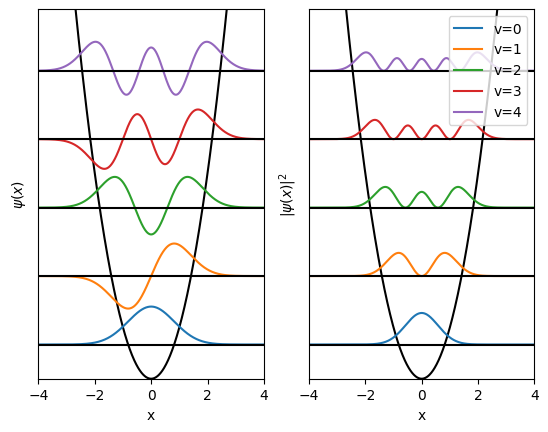

In [69]:
import scipy
import math

H_2 = scipy.special.hermite(4)

x = np.arange(-4, 4.01, 0.01)

alpha = 1.5
hbar = 1.0
m = 1.0


nu = alpha / ( 2 * np.pi * m / hbar)
omega = nu * 2 * np.pi

# potential
potential = 2 * m * nu**2 * np.pi**2 * x**2

wfn = []
energy = []
for v in range (0, 5):
    H_v = scipy.special.hermite(v)
    N_v = ( 2**v * math.factorial(v))**(-0.5) * (alpha/np.pi)**0.25
    psi_v = N_v * np.exp(-alpha*x**2/2) * H_v(alpha**0.5 * x)
    wfn.append(psi_v)

    energy.append(hbar * omega * ( v + 0.5))


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_yticks(ticks=[])
ax1.set_ylabel(r'$\psi(x)$')
ax1.set_xlabel('x')
ax1.plot(x, potential, color = 'black')
ax1.plot(x, wfn[0] + energy[0], label = 'v=0')
ax1.plot(x, wfn[1] + energy[1], label = 'v=1')
ax1.plot(x, wfn[2] + energy[2], label = 'v=2')
ax1.plot(x, wfn[3] + energy[3], label = 'v=3')
ax1.plot(x, wfn[4] + energy[4], label = 'v=4')

ax1.axhline(y=energy[0], color='black')
ax1.axhline(y=energy[1], color='black')
ax1.axhline(y=energy[2], color='black')
ax1.axhline(y=energy[3], color='black')
ax1.axhline(y=energy[4], color='black')

ax1.set_ylim(0, energy[4] * 1.2)
ax1.set_xlim(-4, 4)

ax2.set_yticks(ticks=[])
ax2.set_ylabel(r'$|\psi(x)|^2$')
ax2.set_xlabel('x')
ax2.plot(x, potential, color = 'black')
ax2.plot(x, wfn[0]**2 + energy[0], label = 'v=0')
ax2.plot(x, wfn[1]**2 + energy[1], label = 'v=1')
ax2.plot(x, wfn[2]**2 + energy[2], label = 'v=2')
ax2.plot(x, wfn[3]**2 + energy[3], label = 'v=3')
ax2.plot(x, wfn[4]**2 + energy[4], label = 'v=4')

ax2.set_ylim(0, energy[4] * 1.2)
ax2.set_xlim(-4, 4)

ax2.axhline(y=energy[0], color='black')
ax2.axhline(y=energy[1], color='black')
ax2.axhline(y=energy[2], color='black')
ax2.axhline(y=energy[3], color='black')
ax2.axhline(y=energy[4], color='black')

plt.legend(loc='upper right')
plt.show()

### Selection Rules

## Connections to Computational Chemistry